Cài đặt thư viện

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import  GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Đọc dữ liệu

In [ ]:
# Đọc file CSV và chuyển thành DataFrame
data = pd.read_csv("/content/data_2.csv")
data.head(10)

,CAPACITY,TOPIC,AGE,SEX,STYLE,RATE,WHO,IMPACT,TIME,WORKPLACE,LABLE
0,10,Traffic,46,0,Serious,5,Employee,Important,18,Company,5
1,23,Entertainment,28,0,Friendly,3,Employee,Important,15,Milk tea cafe,2
2,3,Traffic,52,1,Normal,1,Employee,Important,17,Company,3
3,2,Other,23,0,Serious,4,Manager,Very important,15,Milk tea cafe,4
4,44,Other,66,0,Serious,3,Manager,Very important,16,Library,1
5,20,Gaming,22,1,Humorous,2,Other,Important,8,Other,5
6,76,Entertainment,11,1,Serious,1,Manager,Very important,17,Library,2
7,65,Traffic,50,0,Serious,3,Manager,Very important,17,Company,1
8,80,Politics,50,1,Friendly,5,Employee,Not important,22,Library,2
9,32,Other,27,1,Serious,2,Manager,Very important,9,Milk tea cafe,4


In [ ]:
data.shape

(499, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CAPACITY   499 non-null    int64 
 1   TOPIC      499 non-null    object
 2   AGE        499 non-null    int64 
 3   SEX        499 non-null    int64 
 4   STYLE      499 non-null    object
 5   RATE       499 non-null    int64 
 6   WHO        499 non-null    object
 7   IMPPACT    499 non-null    object
 8   TIME       499 non-null    int64 
 9   WORKPLACE  499 non-null    object
 10  LABLE      499 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 43.0+ KB


In [ ]:
data.isnull().sum()

CAPACITY     0
TOPIC        0
AGE          0
SEX          0
STYLE        0
RATE         0
WHO          0
IMPACT       0
TIME         0
WORKPLACE    0
LABLE        0
dtype: int64

In [ ]:
data.duplicated().sum()

0

Phân tích từng cột

In [ ]:
data.describe()

,CAPACITY,AGE,SEX,RATE,TIME,LABLE
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,51.857715,41.148297,0.513026,3.507014,14.364729,3.036072
std,29.004393,15.849887,0.500332,1.302396,4.685194,1.387951
min,2.000000,6.000000,0.000000,1.000000,7.000000,1.000000
25%,27.000000,29.000000,0.000000,3.000000,10.000000,2.000000
50%,53.000000,42.000000,1.000000,4.000000,15.000000,3.000000
75%,78.000000,55.000000,1.000000,5.000000,18.000000,4.000000
max,100.000000,70.000000,1.000000,5.000000,22.000000,5.000000


Tiền xử lí dữ liệu

In [ ]:
object_cols = [f for f in data.columns if data[f].dtype == "O"]
print(object_cols)


['TOPIC', 'STYLE', 'WHO', 'IMPACT', 'WORKPLACE']


Hàm chuẩn hóa

In [ ]:
#Nomalize data function
def nomalize(a, MAX):
  max = np.max(a)
  rate = max/MAX
  a = a / rate
  print(a)
  return a



In [ ]:
data["TOPIC"].value_counts()

Other            79
Entertainment    67
Politics         66
Gaming           63
Traffic          61
Economy          60
Study            56
Environment      47
Name: TOPIC, dtype: int64

In [ ]:
def convert_topic(x):
  if x == "Entertainment":
    return 0
  elif x == "Politics":
    return 1
  elif x == "Gaming":
    return 2
  elif x == "Traffic":
    return 3
  elif x == "Economy":
    return 4
  elif x == "Study":
    return 5
  elif x == "Environment":
    return 6
  elif x == "Other":
    return 7

data["TOPIC"] = data["TOPIC"].apply(convert_topic)

In [ ]:
data["STYLE"].value_counts()

Serious     252
Normal       97
Friendly     76
Humorous     74
Name: STYLE, dtype: int64

In [ ]:
def convert_style(x):
  if x == "Serious":
    return 0
  elif x == "Normal":
    return 1
  elif x == "Friendly":
    return 2
  elif x == "Humorous":
    return 3

data["STYLE"] = data["STYLE"].apply(convert_style)

In [ ]:
data["WHO"].value_counts()

Manager     171
Other       153
Employee    119
Student      29
Teacher      27
Name: WHO, dtype: int64

In [ ]:
def convert_who(x):
  if x == "Manager":
    return 0
  elif x == "Other":
    return 1
  elif x == "Employee":
    return 2
  elif x == "Student":
    return 3
  elif x == "Teacher":
    return 4

data["WHO"] = data["WHO"].apply(convert_who)

In [ ]:
data["IMPACT"].value_counts()

Very important    283
Not important     109
Important         107
Name: IMPACT, dtype: int64

In [ ]:
def convert_impact(x):
  if x == "Very important":
    return 0
  elif x == "Not important":
    return 1
  elif x == "Important":
    return 2

data["IMPACT"] = data["IMPACT"].apply(convert_impact)

In [ ]:
data["WORKPLACE"].value_counts()

Other            105
Library          102
Company          100
Milk tea cafe     95
Home              87
Class             10
Name: WORKPLACE, dtype: int64

In [ ]:
def convert_workplace(x):
  if x == "Other":
    return 0
  elif x == "Library":
    return 1
  elif x == "Company":
    return 2
  elif x == "Milk tea cafe":
    return 3
  elif x == "Home":
    return 4
  elif x == "Class":
    return 5

data["WORKPLACE"] = data["WORKPLACE"].apply(convert_workplace)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CAPACITY   499 non-null    int64
 1   TOPIC      499 non-null    int64
 2   AGE        499 non-null    int64
 3   SEX        499 non-null    int64
 4   STYLE      499 non-null    int64
 5   RATE       499 non-null    int64
 6   WHO        499 non-null    int64
 7   IMPACT     499 non-null    int64
 8   TIME       499 non-null    int64
 9   WORKPLACE  499 non-null    int64
 10  LABLE      499 non-null    int64
dtypes: int64(11)
memory usage: 43.0 KB


Chuẩn hóa dữ liệu

In [ ]:
data['CAPACITY'] =  nomalize(data['CAPACITY'], 1)
data['TOPIC'] =  nomalize(data['TOPIC'], 3)
data['AGE'] =  nomalize(data['AGE'], 2)
data['SEX'] =  nomalize(data['SEX'], 2)
data['STYLE'] =  nomalize(data['STYLE'], 6)
data['WHO'] =  nomalize(data['WHO'], 2)
data['IMPACT'] =  nomalize(data['IMPACT'], 3)
data['TIME'] =  nomalize(data['TIME'], 1)
data['WORKPLACE'] =  nomalize(data['WORKPLACE'], 1)




0      0.10
1      0.23
2      0.03
3      0.02
4      0.44
       ... 
494    0.37
495    0.84
496    0.22
497    0.26
498    0.03
Name: CAPACITY, Length: 499, dtype: float64
0      1.285714
1      0.000000
2      1.285714
3      3.000000
4      3.000000
         ...   
494    1.285714
495    1.285714
496    3.000000
497    1.714286
498    2.142857
Name: TOPIC, Length: 499, dtype: float64
0      1.314286
1      0.800000
2      1.485714
3      0.657143
4      1.885714
         ...   
494    1.571429
495    1.400000
496    0.657143
497    0.428571
498    1.457143
Name: AGE, Length: 499, dtype: float64
0      0.0
1      0.0
2      2.0
3      0.0
4      0.0
      ... 
494    0.0
495    2.0
496    2.0
497    2.0
498    2.0
Name: SEX, Length: 499, dtype: float64
0      0.0
1      4.0
2      2.0
3      0.0
4      0.0
      ... 
494    2.0
495    0.0
496    0.0
497    0.0
498    6.0
Name: STYLE, Length: 499, dtype: float64
0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
494 

In [ ]:
data.describe()

,CAPACITY,TOPIC,AGE,SEX,STYLE,RATE,WHO,IMPACT,TIME,WORKPLACE,LABLE
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.518577,1.485829,1.175666,1.026052,1.887776,3.507014,0.587174,0.970942,0.652942,0.394790,3.036072
std,0.290044,1.014804,0.452854,1.000664,2.235940,1.302396,0.564082,1.217203,0.212963,0.291053,1.387951
min,0.020000,0.000000,0.171429,0.000000,0.000000,1.000000,0.000000,0.000000,0.318182,0.000000,1.000000
25%,0.270000,0.428571,0.828571,0.000000,0.000000,3.000000,0.000000,0.000000,0.454545,0.200000,2.000000
50%,0.530000,1.285714,1.200000,2.000000,0.000000,4.000000,0.500000,0.000000,0.681818,0.400000,3.000000
75%,0.780000,2.571429,1.571429,2.000000,4.000000,5.000000,1.000000,1.500000,0.818182,0.600000,4.000000
max,1.000000,3.000000,2.000000,2.000000,6.000000,5.000000,2.000000,3.000000,1.000000,1.000000,5.000000


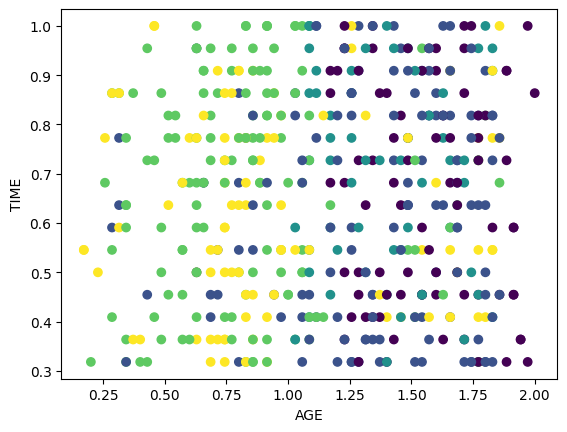

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data["AGE"], data["TIME"], c=data["LABLE"])
plt.xlabel("AGE")
plt.ylabel("TIME")
plt.show()

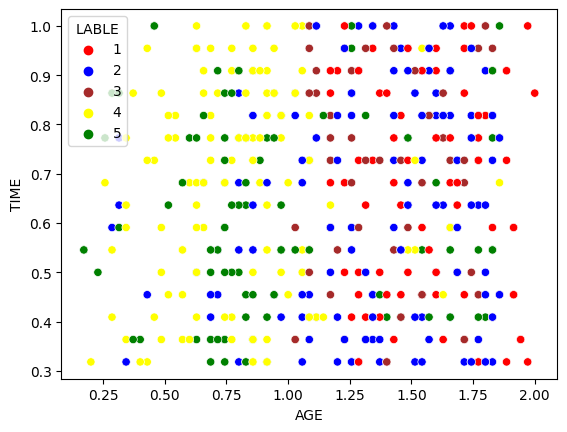

In [ ]:
sns.scatterplot(data, x='AGE', y='TIME', hue='LABLE', palette = ['red','blue','brown','yellow', 'green'])
plt.show()

In [ ]:
X = data.drop(['LABLE', 'RATE'], axis=1)
y = data['LABLE']

data.duplicated().sum()


0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

2    107
4    102
1     72
5     69
3     49
Name: LABLE, dtype: int64
4    32
2    27
5    22
1    10
3     9
Name: LABLE, dtype: int64


In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

# print(y_train.value_counts())

Hyperparameter Tuning

In [ ]:
par = {
    'n_estimators': [1,50,100,200, 300 , 500],
    'learning_rate': [0.01,0.05, 0.1, 0.2, 0.3, 0.5]
}

grid = GridSearchCV(GradientBoostingClassifier(), par)
grid.fit(X_train,y_train)

print(grid.best_params_)


{'learning_rate': 0.01, 'n_estimators': 100}


Tạo model

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)

Cross-validation

In [ ]:


score_rf=cross_val_score(GradientBoostingClassifier(n_estimators=100, learning_rate=0.01),X_train, y_train,cv=5)
print(score_rf)
print("Avg :",np.average(score_rf))


[0.875      0.8625     0.8875     0.85       0.92405063]
Avg : 0.8798101265822785


Train model

In [ ]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

Dự đoán

In [ ]:
y_pred = gb_clf.predict(X_test)
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

Accuracy: 0.900


Evaluating Models

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.77      0.89      0.83        27
           3       0.67      0.22      0.33         9
           4       1.00      1.00      1.00        32
           5       0.92      1.00      0.96        22

    accuracy                           0.90       100
   macro avg       0.87      0.82      0.82       100
weighted avg       0.89      0.90      0.88       100



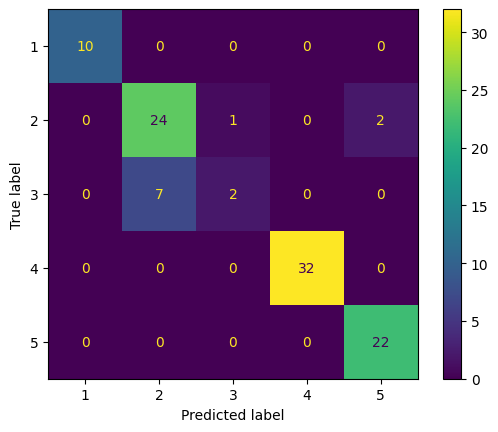

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=gb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_clf.classes_)
disp.plot()
plt.show()

Lưu model

In [ ]:
filename = '/content/train_history.pickle'
pickle.dump(gb_clf, open(filename, 'wb'))

In [ ]:
filename = '/content/train_history.pickle'
load_model = pickle.load(open(filename, 'rb'))
print(load_model)
y_pred = load_model.predict(X_test)
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))


GradientBoostingClassifier(learning_rate=0.01)
Accuracy: 0.900


Dự đoán

In [ ]:
x = {
    'CAPACITY' : [1],
    'TOPIC' :[2],
    'AGE' : [0],
    'SEX' :[1],
    'STYLE' : [2],
    'WHO' : [1],
    'IMPPACT' : [0],
    'TIME' : [1] ,
    'WORKPLACE' : [1]
}

p = pd.DataFrame(data=x)
load_model.predict(p)[0]

4